In [22]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [23]:


"""
def PNewState(X, b, cutoff):
    primes = np.array([2,3,5,7,11,13,17,19,23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97])
    
    ranges = np.ptp(X, axis=0) + 1e-5
    Xnormalized = (X - np.min(X,axis=0)) / ranges # now all values are between 0 and 1
    countedIndices = (Xnormalized[:cutoff] * b).astype(int) # now each row should correspond to the correct index

    uniqueTags = countedIndices @ bprimes
    _, counts = np.unique(uniqueTags, return_counts = True)
    
    return np.sum(np.logical_not(counts-1)) / cutoff # my oh my I am such a clever little fellow
"""

'\ndef PNewState(X, b, cutoff):\n    primes = np.array([2,3,5,7,11,13,17,19,23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97])\n    \n    ranges = np.ptp(X, axis=0) + 1e-5\n    Xnormalized = (X - np.min(X,axis=0)) / ranges # now all values are between 0 and 1\n    countedIndices = (Xnormalized[:cutoff] * b).astype(int) # now each row should correspond to the correct index\n\n    uniqueTags = countedIndices @ bprimes\n    _, counts = np.unique(uniqueTags, return_counts = True)\n    \n    return np.sum(np.logical_not(counts-1)) / cutoff # my oh my I am such a clever little fellow\n'

In [24]:
# testing
X = np.array([[1,0],[1,1],[3,1]])

print(tuple([3]*3))
print(PNewState(X, 2, X.shape[0]))

(3, 3, 3)


NameError: name 'PNewState' is not defined

In [25]:
def Lorenz(xi,t):
    rho = 25.0
    sigma = 10.0
    beta = 8.0 / 3.0
    
    (x,y,z) = xi
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def LorenzP(xi,t, rho, sigma, beta):
    
    (x,y,z) = xi
    return sigma(t) * (y - x), x * (rho(t) - z) - y, x * y - beta(t) * z  # Derivatives

def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

def delayEmbed(Xin, Yin,assignment,embInterval):
    
    tmplen = Xin.shape[1]

    tmp = np.zeros([sum(x) for x in zip(Xin.shape,(0,sum(assignment)))])
    tmp[:,:Xin.shape[1]] = Xin
    Xin = tmp

    lag = 1
    newColInd = 0
    if len(assignment) != tmplen:
        print("Assigment list doesn't match the number of variables in data array! ",assignment)
        return
    else:
        # code that creates the lags
        for i in range(len(assignment)):
            lag = 1
            for _ in range(assignment[i]):
                newCol = Xin[:-embInterval*lag,i]
                Xin[embInterval*lag:, tmplen + newColInd] = newCol
                newColInd += 1
                lag += 1
    Xin = Xin[embInterval*sum(assignment):]
    Yin = Yin[embInterval*sum(assignment):]
    
    # Yin = Yin[-X.shape[0]:]
    
    return (Xin, Yin)

def RosslerP(xi, t, a, b, c):    
    (x,y,z) = xi

    dx = -y - z
    dy = x + a * y
    dz = b + z * ( x - c )

    return np.array( [dx,dy,dz] )

In [219]:
settlingTime = 5

end = 2**6
tlen = 2 ** 15 + settlingTime
reduction = 2 ** 3
# end = 2**8
# tlen = 2 ** 8 + settlingTime
trainToTest = 0.8 # between 0 and 1
t = np.linspace(0, end, num=tlen)

# MAKE SURE TO UPDATE THE DIMENSION WHEN SWITCHING ATTRACTORS
dim = 1
ndrivers = 1
# t0 = np.array([0.5])
t0 = np.ones(dim) * 0.3333# np.array([0,5,15])# np.ones(dim) * 0.3333 # np.array([0,5,15]) * 1 # np.zeros(dim)
# t0 = np.array([0.8,0.1,9])
# t0 = np.array([4,12,17])
# t0 = np.ones(5)
t0[0] += 0.1

In [244]:
"""
t0 = np.array([4,12,17])
Xr = odeint(Lorenz,t0,t)[::reduction]
X = Xr
"""
"""
rho = lambda t : 28 + 0 * t / end# + 2* (2*np.heaviside(t-500, 1)-np.heaviside(t-1000, 1)) #np.sin(np.sqrt(2)/3*2*np.pi*t/tlen) + 4*np.sin(1.687/7*2*np.pi*t/tlen)  # rho = 28.0
# sigma = 10       # sigma = 10.0
sigma = lambda t : 10 + 0 * t / end # np.take(driverArray,t)# + np.cos(1/2*2*np.pi * t / (tlen-2))
beta = lambda t : 8.0 / 3.0 + 3 * t / end # beta = 8.0 / 3.0

largs = lambda t : (rho(t), sigma(t), beta(t))
"""
"""
states = np.zeros((tlen,3))
states[0] = t0
for i in range(1, tlen ):
    # print(largs(i))
    states[i] = odeint(LorenzP,states[i-1],np.array([t[i-1],t[i]]),args=largs(i))[1,:]
"""
# Xr = standardize(odeint(LorenzP, t0, t, args=(rho, sigma, beta))[::reduction,0,None])
# Xr = standardize(states[:,1,None])
# X, _ = delayEmbed(Xr, Xr, [6], 8)
Xr = standardize(odeint(LorenzP, t0, t, args=(rho, sigma, beta)))[::reduction,0,None]
X = Xr

digiDrivers = [F]

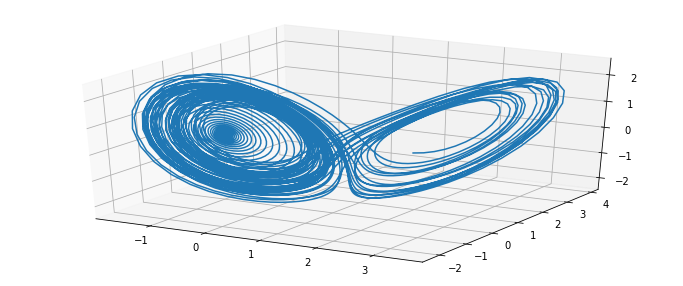

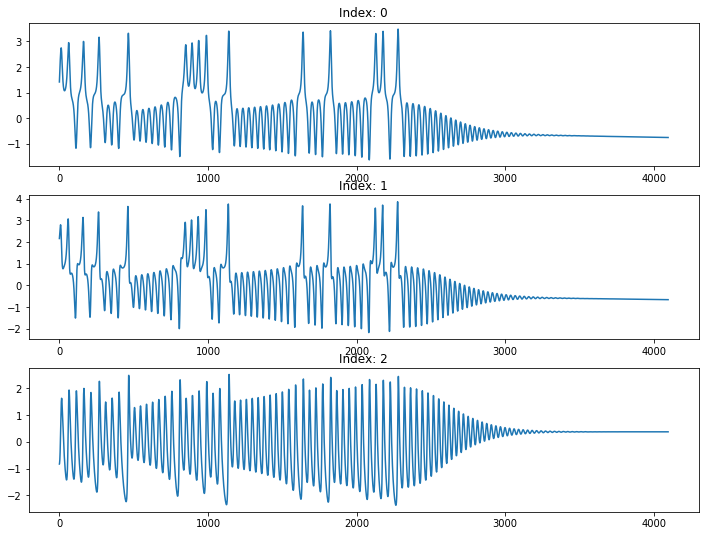

In [245]:
fig2 = plt.figure(2,figsize=(12,5))

if dim == 1:
    ax2 = plt.subplot()
    ax2.plot(Xr[:,0],"b") # states
elif dim == 2:
    ax2 = plt.subplot()
    ax2.plot(Xr[:,0],Xr[:,1])
else:
    ax2 = fig2.gca(projection="3d")
    ax2.plot(Xr[:,0],Xr[:,1],Xr[:,2])
 
"""
embst = 3
ax2 = fig2.gca(projection="3d")
# ax2.plot(t[settlingTime:],Xr[:,0],Xr[:,1])
ax2.plot(Xr[:-2*embst,0],Xr[1*embst:-1*embst,0],Xr[2*embst:,0])
# ax2.plot(Xr[:,0],Xr[:,1],Xr[:,2])
ax2.set_xlabel("Time")
ax2.set_ylabel("Species 1 (standardized)")
ax2.set_zlabel("Species 2 (standardized)")
"""
# ax2.set_title("Density Dependent Maturation")
plt.savefig("Raw Data")

figTS, axTS = plt.subplots(dim,figsize=(12,dim*3))
if dim != 1:
    axTS[0].set_title("Cross section Time Series")
    for i in range(dim):
        axTS[i].set_title("Index: {ind}".format(ind=i))
        axTS[i].plot(Xr[:,i])
else:
    axTS.plot(Xr[:])
        
plt.savefig("Individual Dimensions")
        
if ndrivers != 0:
    figD, axD = plt.subplots(ndrivers, figsize=(12,ndrivers*3))
    if ndrivers == 1:
        axD.set_title("Driver")
        axD.plot(digiDrivers[0](t), c="tab:orange")
    else:
        axD[0].set_title("Driver(s)")
        for d in range(ndrivers):
            axD[d].plot(digiDrivers[d](t), c="tab:orange")
            
    plt.savefig("Drivers")
        
plt.show()

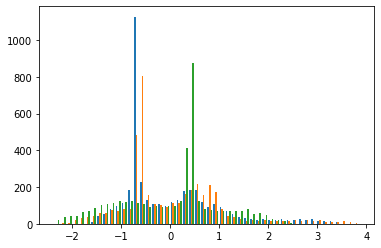

In [246]:
fig, ax = plt.subplots(1)
ax.hist(Xr,bins=50)
plt.show()

In [247]:
# We are interested in the proportion of regions of state space which have been visited only once
# b is the number of subdivisions of one axis
def PNewStateTS(X, b):
    primes = np.array([2,3,5,7,11,13,17,19,23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97])
    
    indices = np.zeros(X.shape, dtype=int)
    quantileProportions = np.linspace(0,1,num=b, endpoint=False)
    quantiles = np.quantile(X, quantileProportions, axis=0)
    for i in range(X.shape[0]):
        indices[i] = np.sum(np.greater_equal(X[i], quantiles), axis=0)
    
    uniqueTags = np.prod(primes[indices], axis=1) # index of i now corresponds to ith prime, product these together
    
    newStateTS = np.zeros(X.shape[0])
    nUniqueStates = 0
    uniqueStates = {}
    for i in range(X.shape[0]):
        if uniqueTags[i] in uniqueStates:
            uniqueStates[uniqueTags[i]] += 1
        else:
            uniqueStates[uniqueTags[i]] = 1
            nUniqueStates += 1
            
        newStateTS[i] = nUniqueStates # / (i+1)
    
    return newStateTS



In [248]:
b = 20

"""
PNewStateArray = np.zeros((X.shape[0],1))
for i in range(1,PNewStateArray.shape[0]):
    PNewStateArray[i] = PNewState(X, b, i)
"""
PNewStateArray = PNewStateTS(X, b)

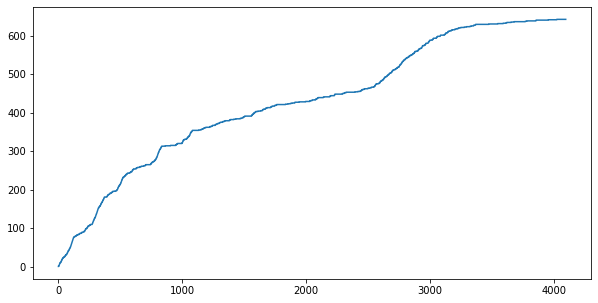

In [249]:
figPNewState, axPNewState = plt.subplots(1, figsize = (10,5))
axPNewState.plot(PNewStateArray)
# axPNewState.plot(1/np.linspace(1,30,num=4096))
plt.show()

In [107]:
sample = np.random.normal(0,1,size=(400,))
quantiles = np.quantile(sample, [0,0.2,0.4,0.6,0.8])
print(quantiles)


[-2.82178022 -0.79118713 -0.29214303  0.17157764  0.75640543]
